## 한글 폰트 설치

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# Facebook Prophet을 활용한 시계열 데이터 예측 모델

이번 튜토리얼 에서는 다음과 같은 **프로세스 파이프라인**으로 주가 예측을 진행합니다.

- FinanceDataReader를 활용하여 주가 데이터 받아오기
- Facebook Prophet을 활용하여 주가 예측

## 필요한 모듈 import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rc('font', family='NanumBarunGothic') 

## 데이터 (FinanceDataReader)

**FinanceDataReader**는 주가 데이터를 편리하게 가져올 수 있는 파이썬 패키지입니다.

- [GitHub Repo](https://github.com/FinanceData/FinanceDataReader)

**FinanceDataReader**가 아직 설치 되지 않으신 분들은 아래의 주석을 해제한 후 명령어로 설치해 주시기 바랍니다.

In [ ]:
!pip install finance-datareader

In [ ]:
import FinanceDataReader as fdr

In [ ]:
# 삼성전자 종목코드: 005930
samsung = fdr.DataReader('005930')

매우 편리하게 삼성전자 주가 데이터를 `DataFrame`형식으로 받아옵니다.

기본 **오름차순 정렬**이 된 데이터임을 알 수 있습니다.

### 컬럼 설명

- `Open`:   시가
- `High`:   고가
- `Low`:    저가
- `Close`:  종가
- `Volume`: 거래량
- `Change`: 대비

In [ ]:
samsung.tail()

Open   High    Low  Close   Volume    Change
Date                                                     
2022-08-22  60300  60400  59800  60000  8259865 -0.014778
2022-08-23  59000  59600  59000  59100  9041629 -0.015000
2022-08-24  59200  59500  59000  59000  8888486 -0.001692
2022-08-25  59200  59700  59000  59700  5767902  0.011864
2022-08-26  60300  60900  59900  60000  9442172  0.005025

**미국 주식 데이터**도 가져올 수 있습니다.

In [ ]:
# Apple(AAPL), 애플
apple = fdr.DataReader('AAPL')

In [ ]:
apple.tail()

Close    Open    High     Low      Volume  Change
Date                                                          
2022-08-22  167.57  169.69  169.86  167.13  69030000.0 -0.0230
2022-08-23  167.23  167.08  168.71  166.65  54150000.0 -0.0020
2022-08-24  167.53  167.32  168.11  166.24  53840000.0  0.0018
2022-08-25  170.03  168.78  170.14  168.35  51220000.0  0.0149
2022-08-26  163.62  170.57  171.05  163.56  77750000.0 -0.0377

### 비트코인 시세

In [ ]:
btc = fdr.DataReader('BTC/KRW', '2018-01-01')
btc

Close      Open      High       Low   Volume  Change
Date                                                               
2018-01-01  18655000  19208000  19296000  18362000  10240.0 -0.0288
2018-01-02  19838000  18655000  20800000  18570000  17460.0  0.0634
2018-01-03  20419000  19838000  20810000  19800000  15670.0  0.0293
2018-01-04  21576000  20419000  21830000  19891000  14730.0  0.0567
2018-01-05  25026000  21576000  25988000  21046000  25290.0  0.1599
...              ...       ...       ...       ...      ...     ...
2022-08-24  29086000  29255000  29668000  28917000    440.0 -0.0058
2022-08-25  29264000  29086000  29500000  29000000    380.0  0.0061
2022-08-26  27914000  29264000  29615000  27765000   1060.0 -0.0461
2022-08-27  27741000  27914000  28113000  27464000    390.0 -0.0062
2022-08-28  27579000  27738000  27873000  27421000     90.0 -0.0058

[1699 rows x 6 columns]

## 시세에 대한 그래프 시각화

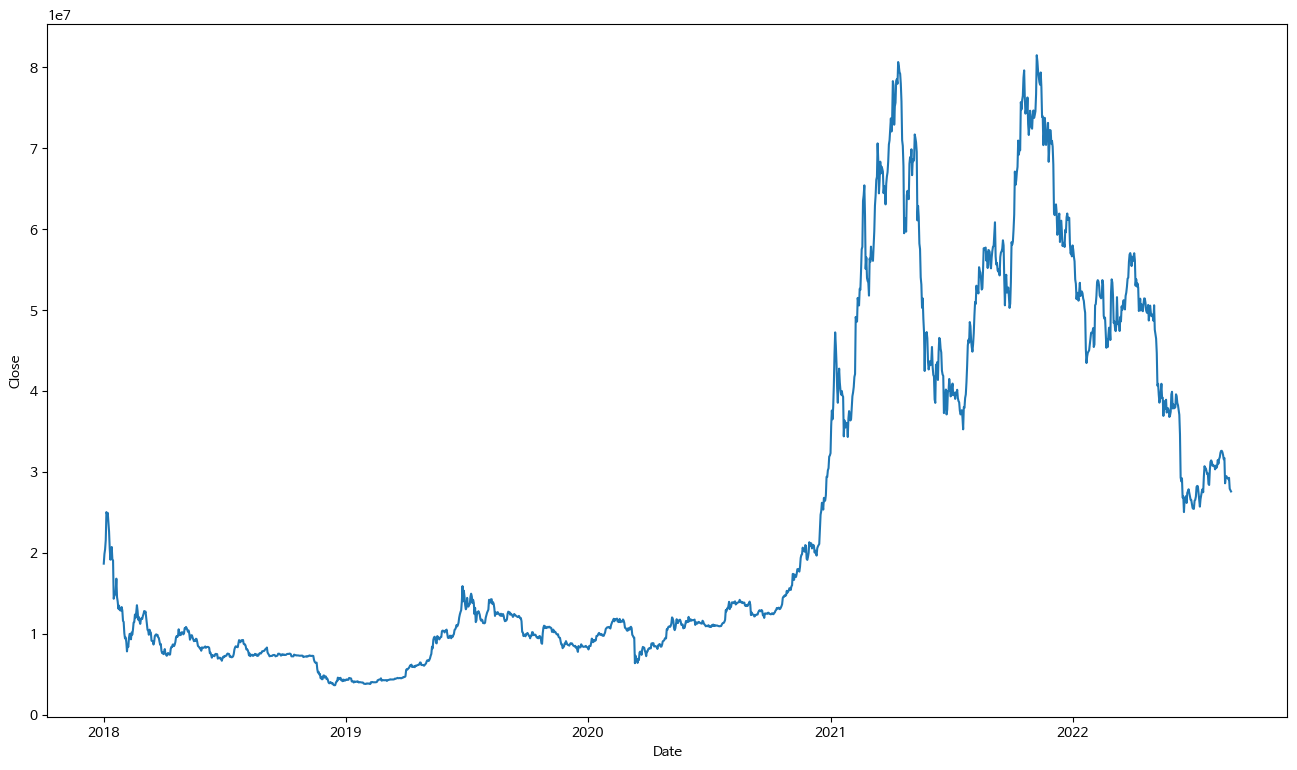

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(x=btc.index, y='Close', data=btc)
plt.show()

**시작**과 **끝** 날짜를 지정하여 범위 데이터를 가져올 수 있습니다.

In [ ]:
# 비트코인 시세
btc = fdr.DataReader('BTC/KRW', '2019-01-01', '2020-12-01')
btc

Close      Open      High       Low   Volume  Change
Date                                                               
2019-01-01   4289000   4199000   4300000   4137000   3230.0  0.0214
2019-01-02   4345000   4294000   4360000   4244000   3860.0  0.0131
2019-01-03   4282000   4352000   4367000   4259000  15370.0 -0.0145
2019-01-04   4309000   4286000   4334000   4243000  19200.0  0.0063
2019-01-05   4297000   4309000   4354000   4278000  24870.0 -0.0028
...              ...       ...       ...       ...      ...     ...
2020-11-27  19119000  19236000  19236000  19119000   1440.0 -0.0067
2020-11-28  19480000  19118000  19480000  19118000   1610.0  0.0189
2020-11-29  20002000  19480000  20002000  19281000    830.0  0.0268
2020-11-30  21302000  19996000  21302000  19996000   2520.0  0.0650
2020-12-01  20848000  21302000  21302000  20848000   1830.0 -0.0213

[699 rows x 6 columns]

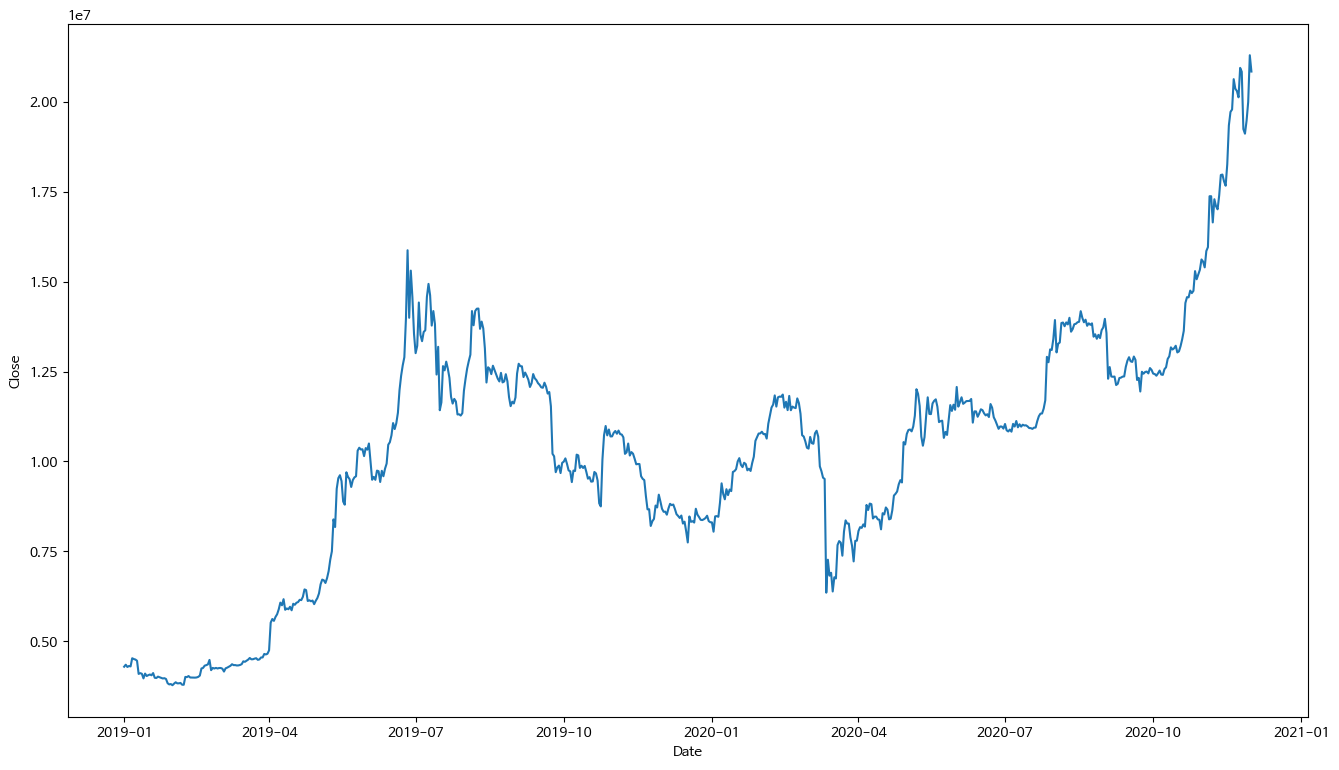

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(x=btc.index, y='Close', data=btc)
plt.show()

그 밖에 **금, 은과 같은 현물**, **달러와 같은 화폐** 데이터도 가져올 수 있습니다.

더욱 자세한 내용은 [GitHub 페이지 링크](https://github.com/FinanceData/FinanceDataReader)를 참고해 보시기 바랍니다.

## 주가데이터 가져오기

In [ ]:
# 삼성전자 주식코드: 005930
STOCK_CODE = '005930'

In [ ]:
stock = fdr.DataReader(STOCK_CODE)

In [ ]:
stock.head()

Open  High  Low  Close   Volume    Change
Date                                                 
1998-06-17   741   794  731    794   878674       NaN
1998-06-18   837   889  828    889  1026804  0.119647
1998-06-19   888   893  811    847  1039669 -0.047244
1998-06-20   859   873  819    866   287300  0.022432
1998-06-22   875   875  828    830   421830 -0.041570

In [ ]:
stock.index

DatetimeIndex(['1998-06-17', '1998-06-18', '1998-06-19', '1998-06-20',
               '1998-06-22', '1998-06-23', '1998-06-24', '1998-06-25',
               '1998-06-26', '1998-06-27',
               ...
               '2022-08-12', '2022-08-16', '2022-08-17', '2022-08-18',
               '2022-08-19', '2022-08-22', '2022-08-23', '2022-08-24',
               '2022-08-25', '2022-08-26'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

In [ ]:
stock.head()

Open  High  Low  Close   Volume    Change
Date                                                 
1998-06-17   741   794  731    794   878674       NaN
1998-06-18   837   889  828    889  1026804  0.119647
1998-06-19   888   893  811    847  1039669 -0.047244
1998-06-20   859   873  819    866   287300  0.022432
1998-06-22   875   875  828    830   421830 -0.041570

## 시각화

Text(0, 0.5, 'price')

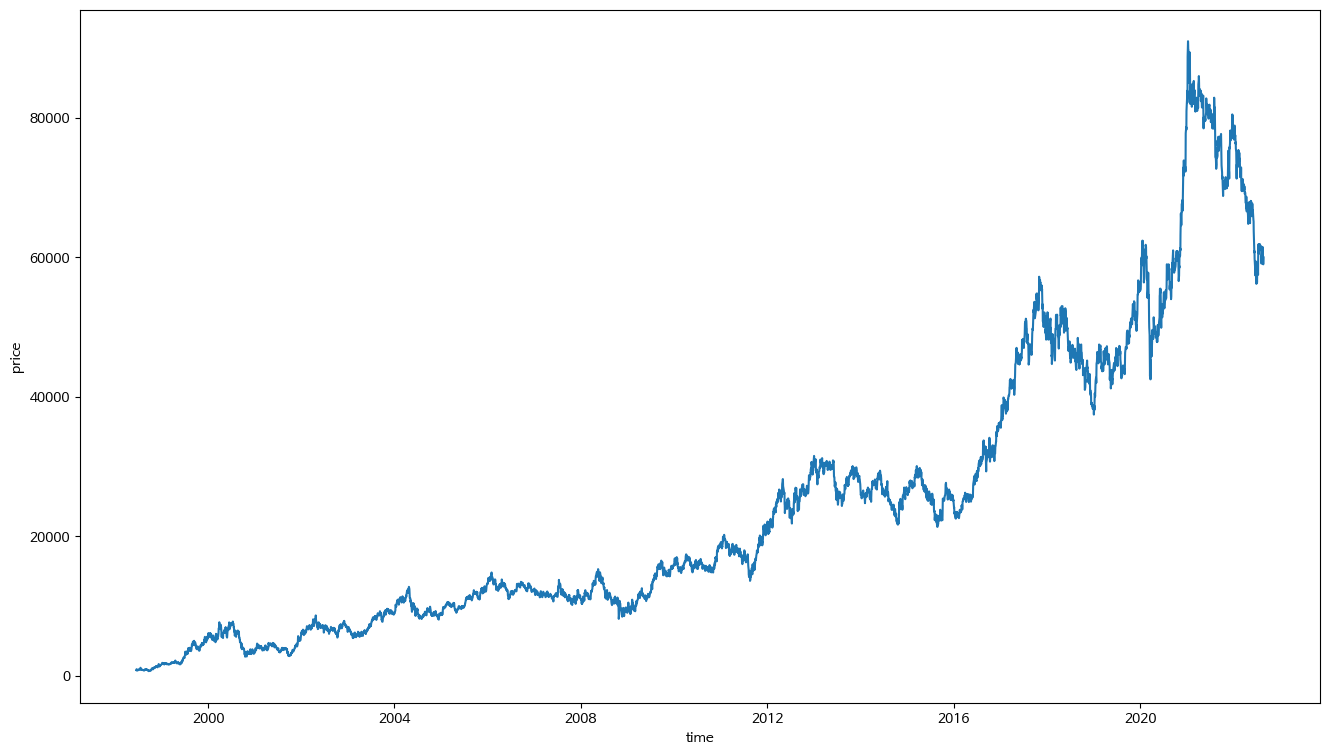

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=stock['Close'], x=stock.index)
plt.xlabel('time')
plt.ylabel('price')

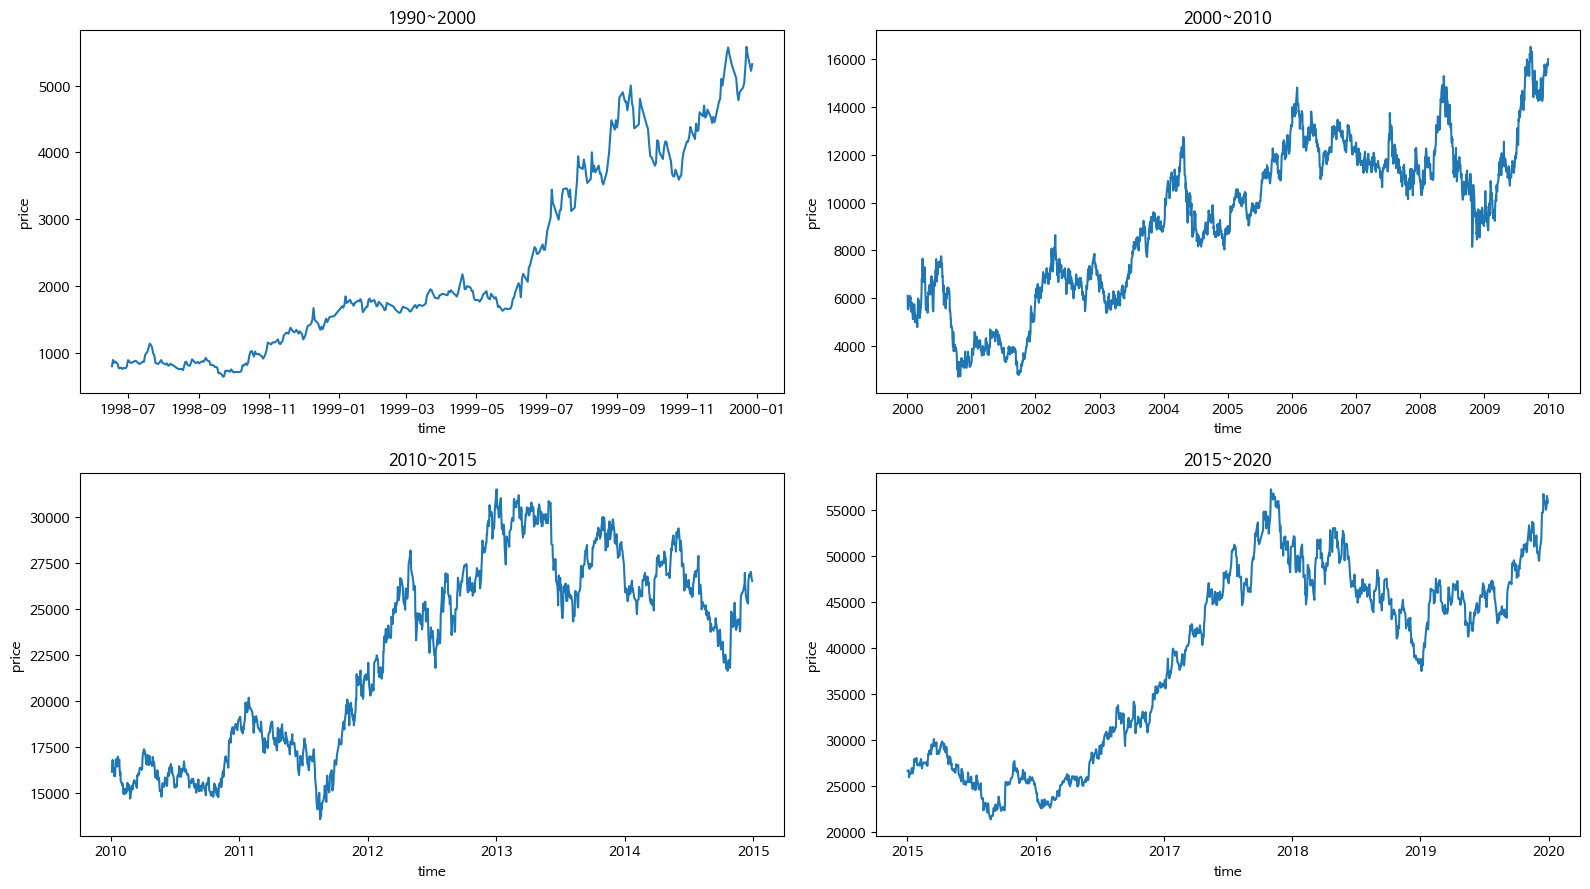

In [ ]:
time_steps = [['1990', '2000'], 
              ['2000', '2010'], 
              ['2010', '2015'], 
              ['2015', '2020']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = stock.loc[(stock.index > time_steps[i][0]) & (stock.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

In [ ]:
stock = fdr.DataReader(STOCK_CODE, '2019')

## Prophet

### 모듈 import

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

### 컬럼

- 반드시 **y** 컬럼과 **ds** 컬럼이 존재해야합니다.
- 예측 값은 **y**, 시계열 데이터는 **ds**에 지정합니다.

In [ ]:
stock['y'] = stock['Close']
stock['ds'] = stock.index

In [ ]:
stock.head()

Open   High    Low  Close    Volume    Change      y         ds
Date                                                                        
2019-01-02  39400  39400  38550  38750   7847664  0.001292  38750 2019-01-02
2019-01-03  38300  38550  37450  37600  12471493 -0.029677  37600 2019-01-03
2019-01-04  37450  37600  36850  37450  14108958 -0.003989  37450 2019-01-04
2019-01-07  38000  38900  37800  38750  12748997  0.034713  38750 2019-01-07
2019-01-08  38000  39200  37950  38100  12756554 -0.016774  38100 2019-01-08

### prophet 객체 선언 및 학습

In [ ]:
m = Prophet()
m.fit(stock)

03:40:04 - cmdstanpy - INFO - Chain [1] start processing
03:40:05 - cmdstanpy - INFO - Chain [1] done processing


(Windows) 사용자의 경우 Error시 다음의 코드를 실행하여 추가 설치 후 진행합니다.

In [ ]:
# import cmdstanpy

# cmdstanpy.install_cmdstan()
# cmdstanpy.install_cmdstan(compiler=True) # only valid on Windows

**period**에 예측 하고 싶은 기간을 입력 합니다.

예측할 시계열 row가 추가 됩니다.

`periods`에 예측할 기간을 입력합니다.

In [ ]:
future = m.make_future_dataframe(periods=30)
future.tail()

ds
928 2022-09-21
929 2022-09-22
930 2022-09-23
931 2022-09-24
932 2022-09-25

- `predict`로 예측을 진행합니다.
- `predict` 안에는 이전 단계에서 만들어준 future 데이터프레임을 입력합니다.


In [ ]:
forecast = m.predict(future)
forecast.tail()

ds         trend    yhat_lower    yhat_upper   trend_lower  \
928 2022-09-21  60802.820315  55187.745393  60154.035349  60660.894714   
929 2022-09-22  60757.431922  55028.788991  60169.603070  60604.318328   
930 2022-09-23  60712.043529  54881.321979  59980.286465  60545.759694   
931 2022-09-24  60666.655136  57495.762828  62649.965008  60484.973690   
932 2022-09-25  60621.266742  57452.687803  62647.141659  60427.613770   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
928  60993.952930    -3087.388263          -3087.388263          -3087.388263   
929  60972.160394    -3165.596727          -3165.596727          -3165.596727   
930  60944.289305    -3222.104021          -3222.104021          -3222.104021   
931  60912.608250     -373.664490           -373.664490           -373.664490   
932  60888.151707     -450.465752           -450.465752           -450.465752   

          weekly  weekly_lower  weekly_upper       yearly  yearly_lower  \
928  -789.903836   -789.903836   -789.903836 -2297.484427  -2297.484427   
929  -846.544790   -846.544790   -846.544790 -2319.051937  -2319.051937   
930  -862.200554   -862.200554   -862.200554 -2359.903467  -2359.903467   
931  2045.609705   2045.609705   2045.609705 -2419.274195  -2419.274195   
932  2045.612747   2045.612747   2045.612747 -2496.078499  -2496.078499   

     yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
928  -2297.484427                   0.0                         0.0   
929  -2319.051937                   0.0                         0.0   
930  -2359.903467                   0.0                         0.0   
931  -2419.274195                   0.0                         0.0   
932  -2496.078499                   0.0                         0.0   

     multiplicative_terms_upper          yhat  
928                         0.0  57715.432053  
929                         0.0  57591.835195  
930                         0.0  57489.939508  
931                         0.0  60292.990646  
932                         0.0  60170.800990

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-40:-20]

ds          yhat    yhat_lower    yhat_upper
893 2022-08-12  59219.881083  56507.621810  61705.241877
894 2022-08-16  58494.542745  55801.752890  61144.511094
895 2022-08-17  58190.802669  55757.656953  60707.534303
896 2022-08-18  57922.447999  55352.527663  60146.398551
897 2022-08-19  57703.066513  55137.354647  60248.226083
898 2022-08-22  57133.660301  54603.622388  59614.739241
899 2022-08-23  57166.945448  54749.242135  59790.325210
900 2022-08-24  56945.901849  54346.919869  59476.024146
901 2022-08-25  56772.770393  54209.929532  59522.180888
902 2022-08-26  56659.911719  54063.910507  59230.699018
903 2022-08-27  59490.473554  57051.951479  62024.349582
904 2022-08-28  59433.541481  56873.438122  61884.031936
905 2022-08-29  56462.452927  53893.111832  58877.968483
906 2022-08-30  56631.142521  54155.855558  59130.319206
907 2022-08-31  56547.842324  54054.432910  59126.546651
908 2022-09-01  56512.626415  53964.655452  59127.892939
909 2022-09-02  56535.644313  53935.946379  59042.884796
910 2022-09-03  59497.828095  57032.205380  62238.102200
911 2022-09-04  59566.084217  56895.690856  62157.126874
912 2022-09-05  56711.649008  53921.372163  59247.624397

### 시각화

`plot`은 트렌드와 함께 예측된 결과물을 시각화하여 보여줍니다.

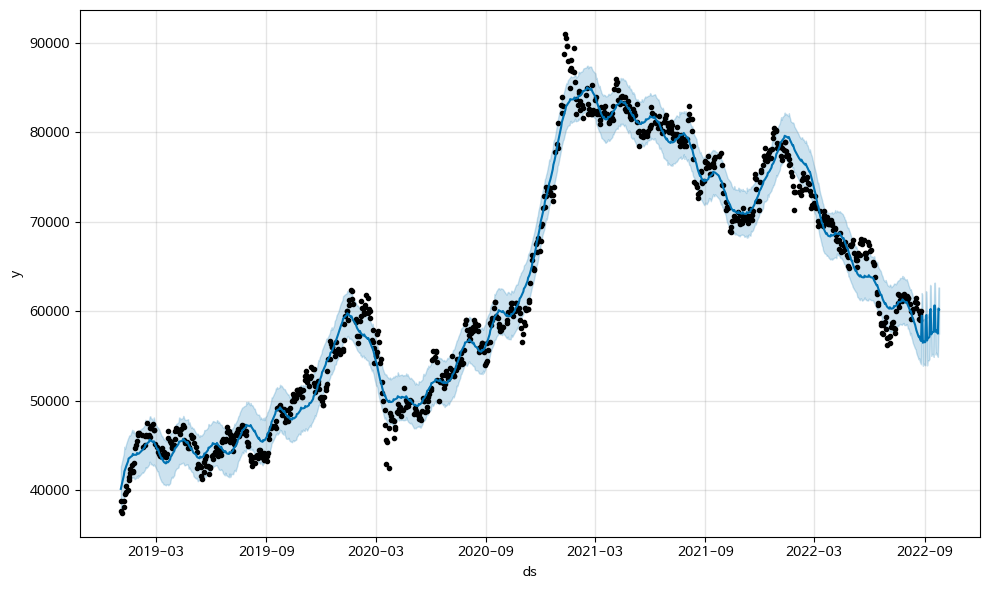

In [ ]:
fig = m.plot(forecast)

### plotly 활용

In [ ]:
fig = plot_plotly(m, forecast)
fig

### 컴포넌트 별 시각화

컴포넌트 별 시각화에서는 seasonality 별 시각화를 진행해 볼 수 있습니다.

**trend, yearly, weekly 데이터를 시각화**하여 보여 줍니다.

In [ ]:
plot_components_plotly(m, forecast)

### change points

By default, Prophet specifies 25 potential changepoints which are uniformly placed in the first 80% of the time series. The vertical lines in this figure indicate where the potential changepoints were placed:

처음 80%의 시계열 데이터에 대하여 잠재적인 25개의 changepoints를 만들고, 그 중 선별하여 최종 changepoints를 그래프에서 vertical line으로 그려주게 됩니다.

In [ ]:
from prophet.plot import add_changepoints_to_plot

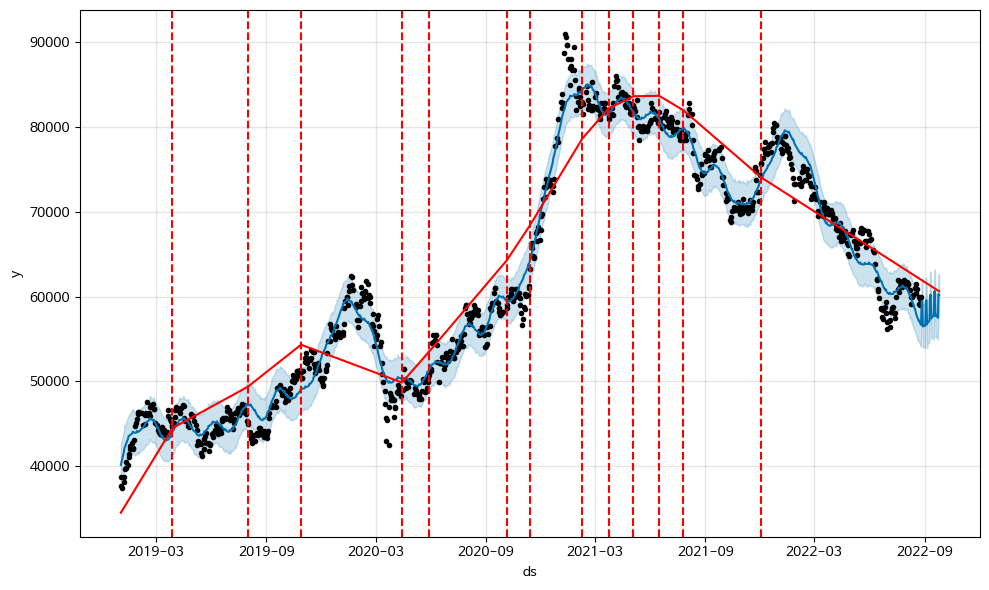

In [ ]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

### flexibility 조절

If the trend changes are being overfit (too much flexibility) or underfit (not enough flexibility), you can adjust the strength of the sparse prior using the input argument changepoint_prior_scale. By default, this parameter is set to 0.05. Increasing it will make the trend more flexible:

flexibility **계수가 낮으면 과소적합, 높으면 과대적합**하여 예측하게 됩니다.

중요한 hyperparameter 입니다.

03:40:23 - cmdstanpy - INFO - Chain [1] start processing
03:40:23 - cmdstanpy - INFO - Chain [1] done processing


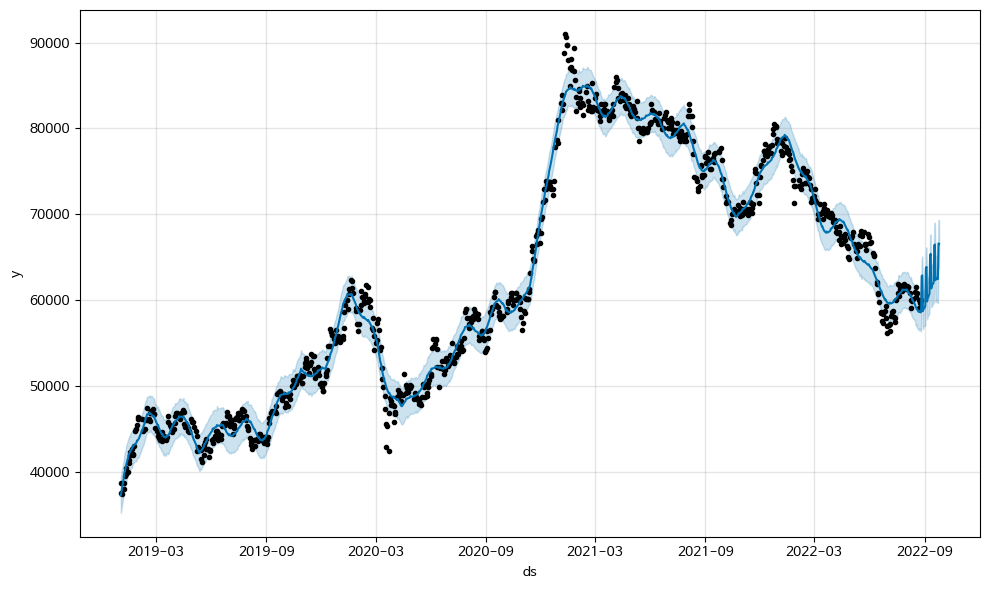

In [ ]:
m = Prophet(changepoint_prior_scale=0.8)
forecast = m.fit(stock).predict(future)
fig = m.plot(forecast)

03:40:26 - cmdstanpy - INFO - Chain [1] start processing
03:40:26 - cmdstanpy - INFO - Chain [1] done processing


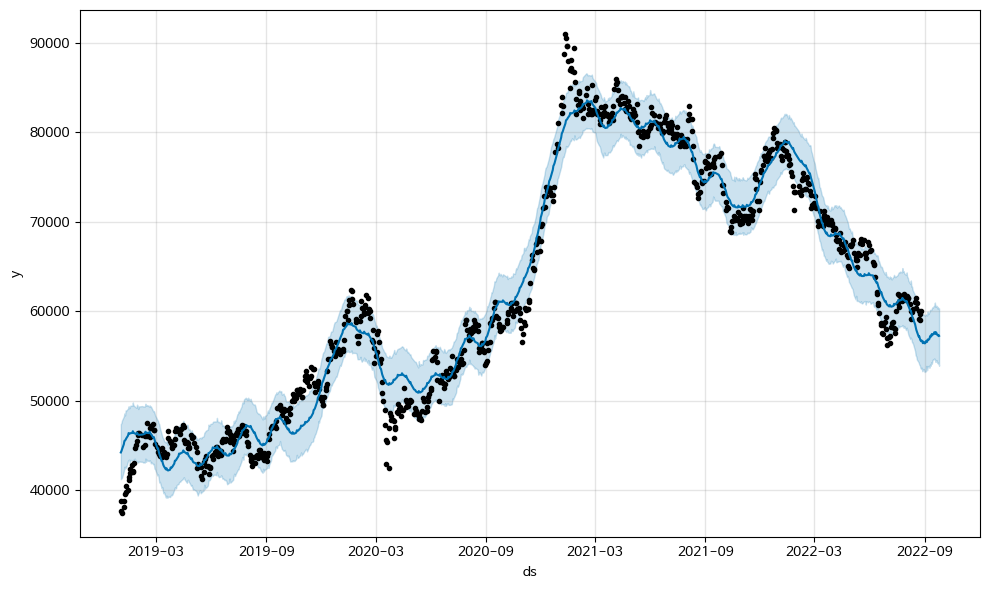

In [ ]:
m = Prophet(changepoint_prior_scale=0.01)
forecast = m.fit(stock).predict(future)
fig = m.plot(forecast)

## 서울시 코로나 확진자 현황

[데이터셋 다운로드](http://data.seoul.go.kr/dataList/OA-20279/S/1/datasetView.do)

In [ ]:
# 서울시 코로나 확진자 데이터 다운로드
import urllib.request

urllib.request.urlretrieve('https://www.dropbox.com/s/vv9mh6ciq9xnart/seoul_covid19.csv?dl=1', 'seoul_covid.csv')

('seoul_covid.csv', <http.client.HTTPMessage at 0x1d042697580>)

In [ ]:
corona = pd.read_csv('seoul_covid.csv')
corona

연번         확진일  환자번호  국적      환자정보   지역  여행력        접촉력  조치사항  상태  \
0       182558  2021-12-11   NaN NaN       NaN   기타  NaN   감염경로 조사중   NaN   -   
1       182557  2021-12-11   NaN NaN       NaN  성북구  NaN   감염경로 조사중   NaN   -   
2       182556  2021-12-11   NaN NaN       NaN   중구  NaN   감염경로 조사중   NaN   -   
3       182555  2021-12-11   NaN NaN       NaN   기타  NaN   감염경로 조사중   NaN   -   
4       182554  2021-12-11   NaN NaN       NaN  광진구  NaN   감염경로 조사중   NaN   -   
...        ...         ...   ...  ..       ...  ...  ...        ...   ...  ..   
182553       5  2020-01-31   9.0 NaN  650909-1  성북구  NaN  기타 확진자 접촉   NaN  퇴원   
182554       4  2020-01-30   7.0 NaN  561220-1  마포구   중국       해외유입   NaN  퇴원   
182555       3  2020-01-30   6.0 NaN  810212-1  종로구  NaN   종로구 집단발병   NaN  퇴원   
182556       2  2020-01-30   5.0 NaN  400415-1  중랑구   중국       해외유입   NaN  퇴원   
182557       1  2020-01-24   2.0 NaN  600716-1  강서구   중국       해외유입   NaN  퇴원   

       이동경로               등록일               수정일 노출여부  
0       NaN  2021-12-12 10:48  2021-12-12 10:48    Y  
1       NaN  2021-12-12 10:48  2021-12-12 10:48    Y  
2       NaN  2021-12-12 10:48  2021-12-12 10:48    Y  
3       NaN  2021-12-12 10:48  2021-12-12 10:48    Y  
4       NaN  2021-12-12 10:48  2021-12-12 10:48    Y  
...     ...               ...               ...  ...  
182553  NaN  2021-05-27 11:08  2021-05-27 11:08    Y  
182554  NaN  2021-05-27 11:08  2021-05-27 11:08    Y  
182555  NaN  2021-05-27 11:08  2021-05-27 11:08    Y  
182556  NaN  2021-05-27 11:08  2021-05-27 11:08    Y  
182557  NaN  2021-05-27 11:08  2021-05-27 11:08    Y  

[182558 rows x 14 columns]

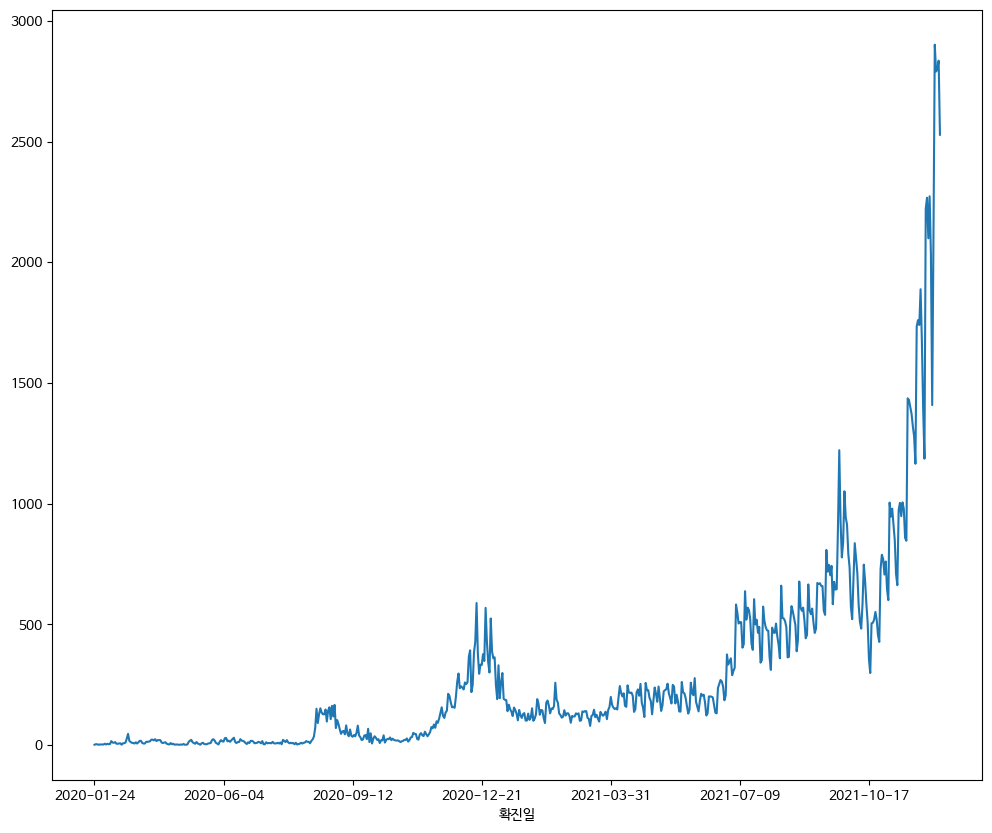

In [ ]:
plt.figure(figsize=(12, 10))
corona.groupby('확진일')['연번'].count().plot()
plt.show()

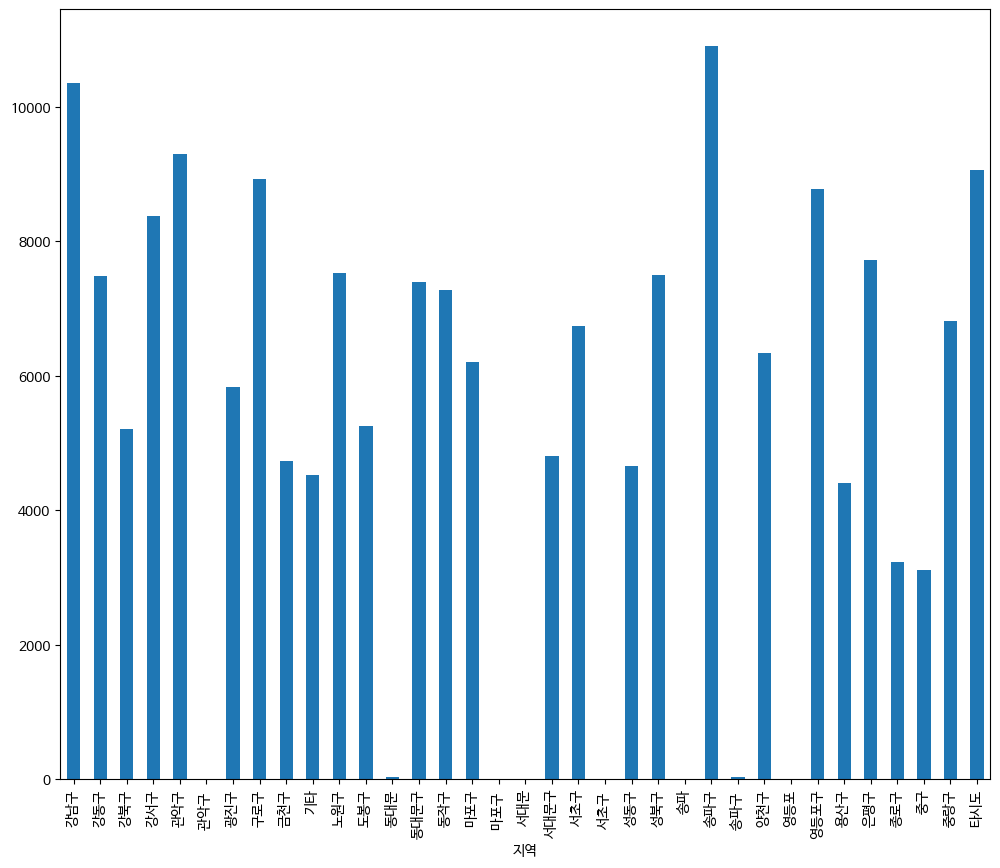

In [ ]:
plt.figure(figsize=(12, 10))
corona.groupby('지역')['연번'].count().plot(kind='bar')
plt.show()

## 정확한 분석을 위한 데이터 클린징

공백이 들어간 경우

In [ ]:
corona.loc[corona['지역'] == '관악구 ']

연번         확진일  환자번호  국적 환자정보    지역  여행력        접촉력  조치사항 상태 이동경로  \
1428   181130  2021-12-11   NaN NaN  NaN  관악구   NaN   감염경로 조사중   NaN  -  NaN   
1464   181094  2021-12-11   NaN NaN  NaN  관악구   NaN   감염경로 조사중   NaN  -  NaN   
1774   180784  2021-12-11   NaN NaN  NaN  관악구   NaN  기타 확진자 접촉   NaN  -  NaN   
12155  170403  2021-12-07   NaN NaN  NaN  관악구   NaN  기타 확진자 접촉   NaN  -  NaN   

                    등록일               수정일 노출여부  
1428   2021-12-12 10:48  2021-12-12 10:48    Y  
1464   2021-12-12 10:48  2021-12-12 10:48    Y  
1774   2021-12-12 10:48  2021-12-12 10:48    Y  
12155  2021-12-12 10:48  2021-12-12 10:48    Y

공백이 들어가지 않은 경우

In [ ]:
corona.loc[corona['지역'] == '관악구']

연번         확진일    환자번호  국적      환자정보   지역  여행력         접촉력  조치사항  \
40      182518  2021-12-11     NaN NaN       NaN  관악구  NaN    감염경로 조사중   NaN   
51      182507  2021-12-11     NaN NaN       NaN  관악구  NaN    감염경로 조사중   NaN   
70      182488  2021-12-11     NaN NaN       NaN  관악구  NaN    감염경로 조사중   NaN   
91      182467  2021-12-11     NaN NaN       NaN  관악구  NaN    감염경로 조사중   NaN   
200     182358  2021-12-11     NaN NaN       NaN  관악구  NaN    감염경로 조사중   NaN   
...        ...         ...     ...  ..       ...  ...  ...         ...   ...   
182440     118  2020-03-07  6845.0 NaN  510419-1  관악구  NaN  타시도 확진자 접촉   NaN   
182471      87  2020-02-29  3491.0 NaN  690602-1  관악구  NaN  타시도 확진자 접촉   NaN   
182484      74  2020-02-28  2466.0 NaN  700817-1  관악구  NaN   기타 확진자 접촉   NaN   
182505      53  2020-02-26  1295.0 NaN  800216-1  관악구  NaN  타시도 확진자 접촉   NaN   
182521      37  2020-02-25   935.0 NaN  880323-1  관악구  NaN   기타 확진자 접촉   NaN   

        상태 이동경로               등록일               수정일 노출여부  
40       -  NaN  2021-12-12 10:48  2021-12-12 10:48    Y  
51       -  NaN  2021-12-12 10:48  2021-12-12 10:48    Y  
70       -  NaN  2021-12-12 10:48  2021-12-12 10:48    Y  
91       -  NaN  2021-12-12 10:48  2021-12-12 10:48    Y  
200      -  NaN  2021-12-12 10:48  2021-12-12 10:48    Y  
...     ..  ...               ...               ...  ...  
182440  퇴원  NaN  2021-05-27 11:08  2021-05-27 11:08    Y  
182471  퇴원  NaN  2021-05-27 11:08  2021-05-27 11:08    Y  
182484  퇴원  NaN  2021-05-27 11:08  2021-05-27 11:08    Y  
182505  퇴원  NaN  2021-05-27 11:08  2021-05-27 11:08    Y  
182521  퇴원  NaN  2021-05-27 11:08  2021-05-27 11:08    Y  

[9296 rows x 14 columns]

공백을 제거하는 함수 `strip()`활용

In [ ]:
corona['지역'].apply(lambda x: x.strip())

0          기타
1         성북구
2          중구
3          기타
4         광진구
         ... 
182553    성북구
182554    마포구
182555    종로구
182556    중랑구
182557    강서구
Name: 지역, Length: 182558, dtype: object

In [ ]:
corona['지역'] = corona['지역'].apply(lambda x: x.strip())

공백이 들어간 데이터가 제거되었음을 확인합니다.

In [ ]:
corona.loc[corona['지역'] == '관악구 ']

Empty DataFrame
Columns: [연번, 확진일, 환자번호, 국적, 환자정보, 지역, 여행력, 접촉력, 조치사항, 상태, 이동경로, 등록일, 수정일, 노출여부]
Index: []

**구**가 빠진 지역명은 구를 추가합니다.

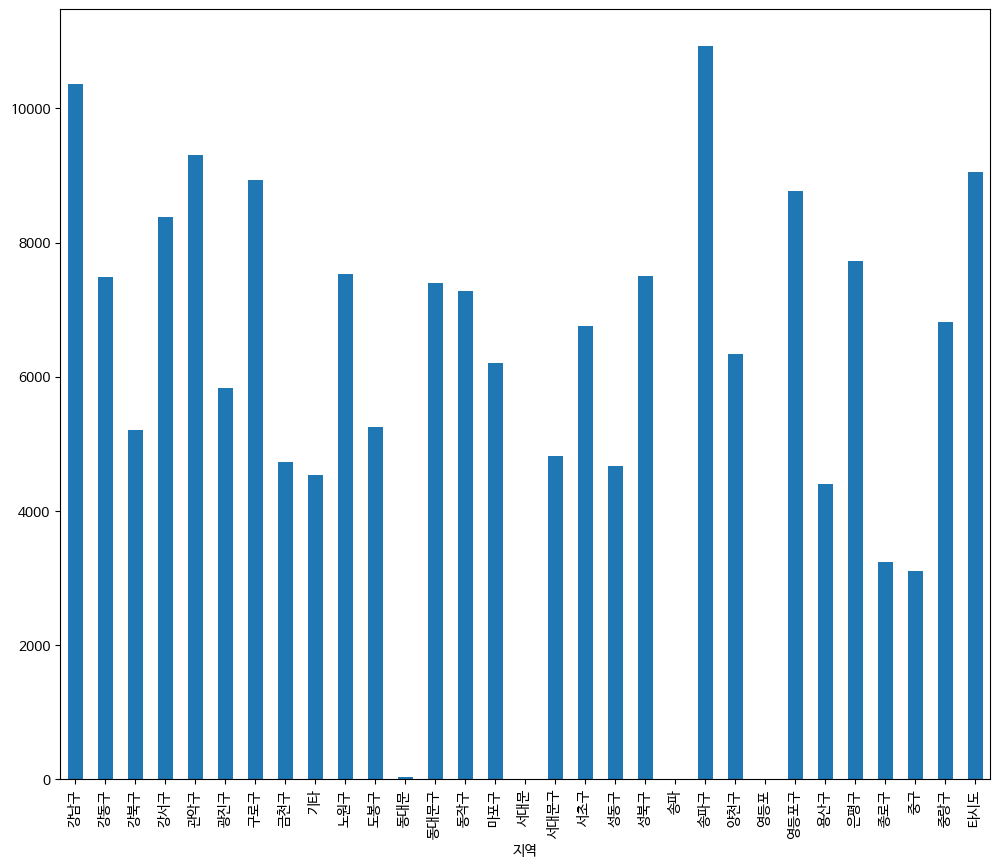

In [ ]:
plt.figure(figsize=(12, 10))
corona.groupby('지역')['연번'].count().plot(kind='bar')
plt.show()

In [ ]:
target = ['동대문', '서대문', '송파', '영등포']

In [ ]:
corona['지역'].apply(lambda x: x + '구' if x in target else x).value_counts()

송파구     10932
강남구     10358
관악구      9300
타시도      9057
구로구      8932
영등포구     8779
강서구      8376
은평구      7721
노원구      7535
성북구      7504
강동구      7479
동대문구     7431
동작구      7273
중랑구      6815
서초구      6750
양천구      6341
마포구      6202
광진구      5826
도봉구      5251
강북구      5208
서대문구     4817
금천구      4735
성동구      4665
기타       4529
용산구      4399
종로구      3232
중구       3111
Name: 지역, dtype: int64

In [ ]:
corona['지역'] = corona['지역'].apply(lambda x: x + '구' if x in target else x)

지역이 깔끔하게 전처리 되었음을 확인합니다.

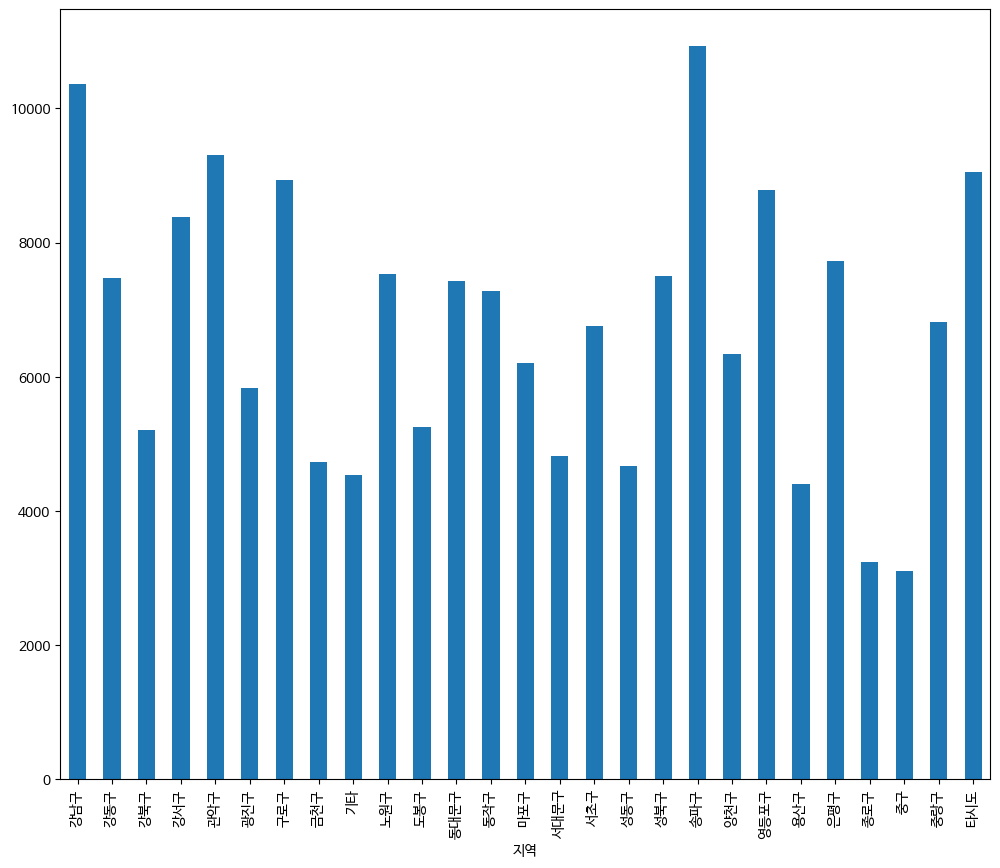

In [ ]:
plt.figure(figsize=(12, 10))
corona.groupby('지역')['연번'].count().plot(kind='bar')
plt.show()

확진자 숫자를 기준으로 오름차순 정렬합니다.

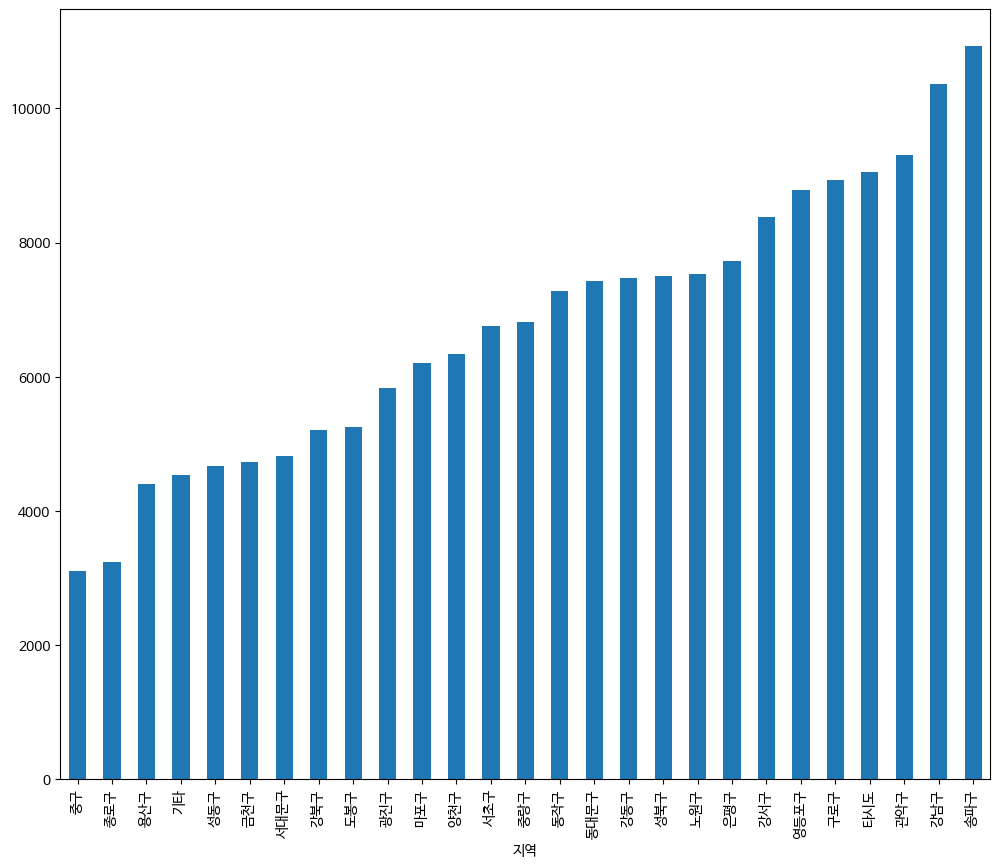

In [ ]:
plt.figure(figsize=(12, 10))
corona.groupby('지역')['연번'].count().sort_values().plot(kind='bar')
plt.show()

In [ ]:
import folium
import requests
import json

In [ ]:
# 서울 행정구역 json raw파일(githubcontent)
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)

In [ ]:
# 위도
latitude = 37.394946
# 경도
longitude = 127.111104

In [ ]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=10, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data=seoul_geo,
             data=corona.groupby('지역')['연번'].count().sort_values(),
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.3,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name=f'코로나 확진자 현황', 
            )
m

In [ ]:
corona.head()

연번         확진일  환자번호  국적 환자정보   지역  여행력       접촉력  조치사항 상태 이동경로  \
0  182558  2021-12-11   NaN NaN  NaN   기타  NaN  감염경로 조사중   NaN  -  NaN   
1  182557  2021-12-11   NaN NaN  NaN  성북구  NaN  감염경로 조사중   NaN  -  NaN   
2  182556  2021-12-11   NaN NaN  NaN   중구  NaN  감염경로 조사중   NaN  -  NaN   
3  182555  2021-12-11   NaN NaN  NaN   기타  NaN  감염경로 조사중   NaN  -  NaN   
4  182554  2021-12-11   NaN NaN  NaN  광진구  NaN  감염경로 조사중   NaN  -  NaN   

                등록일               수정일 노출여부  
0  2021-12-12 10:48  2021-12-12 10:48    Y  
1  2021-12-12 10:48  2021-12-12 10:48    Y  
2  2021-12-12 10:48  2021-12-12 10:48    Y  
3  2021-12-12 10:48  2021-12-12 10:48    Y  
4  2021-12-12 10:48  2021-12-12 10:48    Y

In [ ]:
corona_df = corona.groupby('확진일')['연번'].count().reset_index()
corona_df

확진일    연번
0    2020-01-24     1
1    2020-01-30     3
2    2020-01-31     3
3    2020-02-02     1
4    2020-02-05     2
..          ...   ...
651  2021-12-07  2901
652  2021-12-08  2790
653  2021-12-09  2800
654  2021-12-10  2835
655  2021-12-11  2528

[656 rows x 2 columns]

In [ ]:
corona_df.columns = ['ds', 'y']
corona_df

ds     y
0    2020-01-24     1
1    2020-01-30     3
2    2020-01-31     3
3    2020-02-02     1
4    2020-02-05     2
..          ...   ...
651  2021-12-07  2901
652  2021-12-08  2790
653  2021-12-09  2800
654  2021-12-10  2835
655  2021-12-11  2528

[656 rows x 2 columns]

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

m = Prophet(changepoint_prior_scale=5.5, yearly_seasonality=False, weekly_seasonality=True, daily_seasonality=False)
m.fit(corona_df)

03:43:31 - cmdstanpy - INFO - Chain [1] start processing
03:43:31 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=30)
future.tail()

ds
681 2022-01-06
682 2022-01-07
683 2022-01-08
684 2022-01-09
685 2022-01-10

In [ ]:
forecast = m.predict(future)
forecast.tail()

ds        trend   yhat_lower   yhat_upper  trend_lower  \
681 2022-01-06  1859.718259  1638.706194  2127.890279  1756.552287   
682 2022-01-07  1870.174010  1640.894113  2143.575237  1759.943038   
683 2022-01-08  1880.629762  1587.381877  2136.046505  1763.094645   
684 2022-01-09  1891.085514  1541.543636  2093.156002  1767.459916   
685 2022-01-10  1901.541265  1580.074914  2101.975918  1772.228415   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
681  1961.929589       26.735790             26.735790             26.735790   
682  1979.036119       22.627551             22.627551             22.627551   
683  1994.482755       -3.271721             -3.271721             -3.271721   
684  2012.580974      -59.643491            -59.643491            -59.643491   
685  2027.160526      -55.981263            -55.981263            -55.981263   

        weekly  weekly_lower  weekly_upper  multiplicative_terms  \
681  26.735790     26.735790     26.735790                   0.0   
682  22.627551     22.627551     22.627551                   0.0   
683  -3.271721     -3.271721     -3.271721                   0.0   
684 -59.643491    -59.643491    -59.643491                   0.0   
685 -55.981263    -55.981263    -55.981263                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper         yhat  
681                         0.0                         0.0  1886.454049  
682                         0.0                         0.0  1892.801561  
683                         0.0                         0.0  1877.358041  
684                         0.0                         0.0  1831.442023  
685                         0.0                         0.0  1845.560002

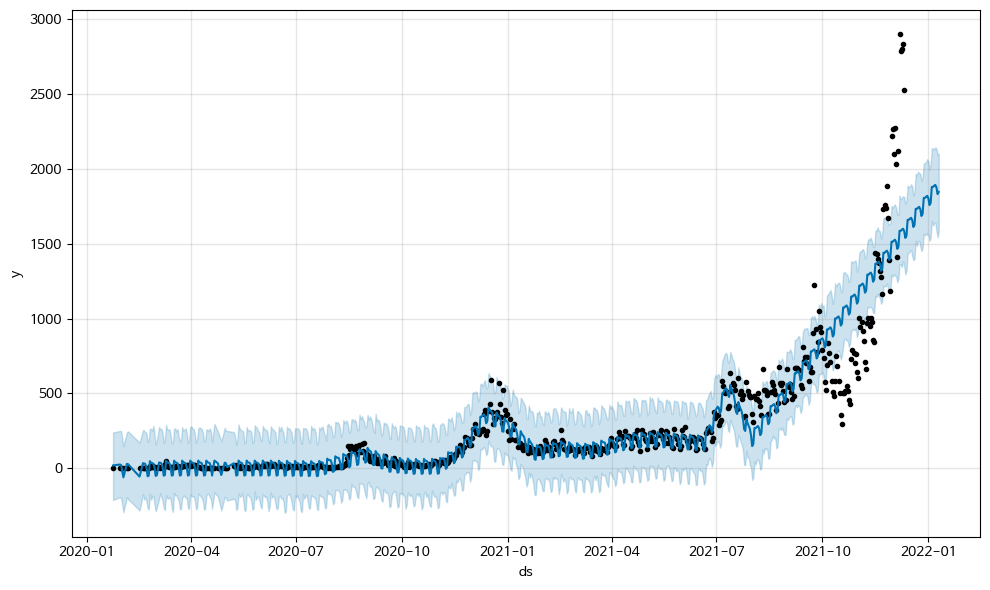

In [ ]:
fig = m.plot(forecast)

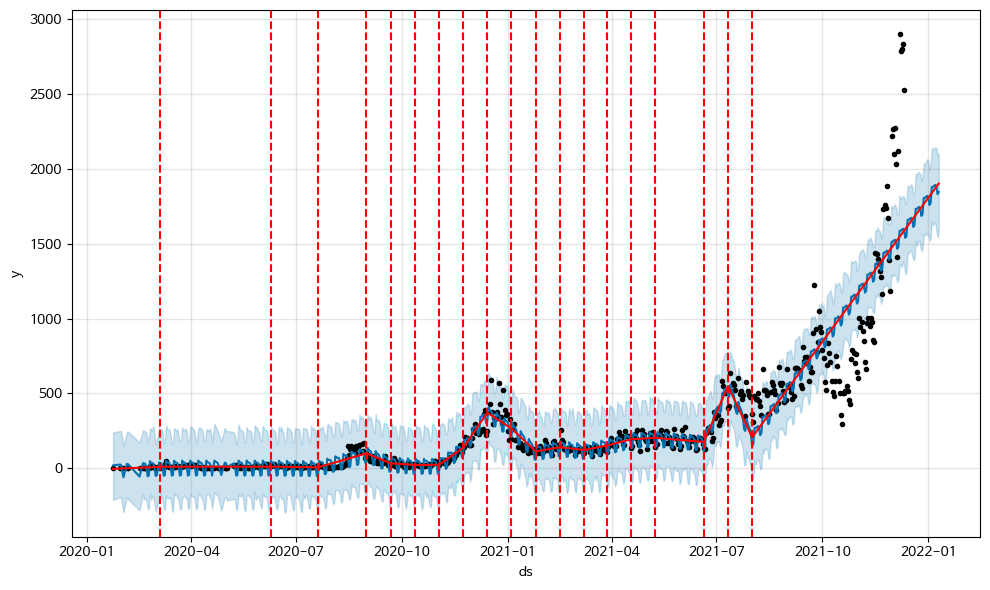

In [ ]:
from prophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

03:43:41 - cmdstanpy - INFO - Chain [1] start processing
03:43:41 - cmdstanpy - INFO - Chain [1] done processing


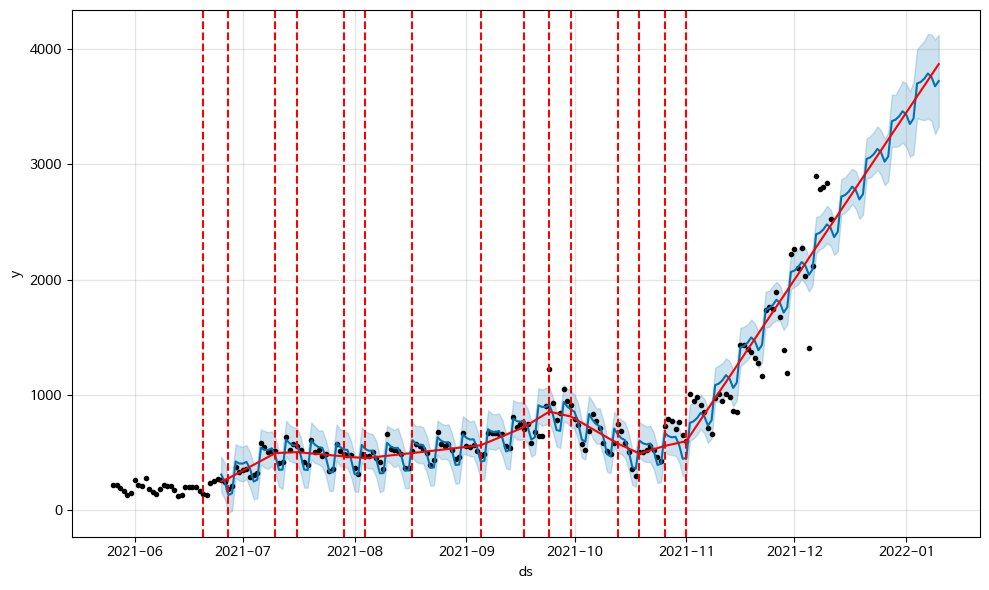

In [ ]:
# 최근 N일 데이터로 시뮬레이션 결과
N = 200
m = Prophet(changepoint_prior_scale=1.5, yearly_seasonality=False, weekly_seasonality=True, daily_seasonality=False)
forecast = m.fit(corona_df.iloc[-N:]).predict(future.iloc[-N:])
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

03:43:43 - cmdstanpy - INFO - Chain [1] start processing
03:43:43 - cmdstanpy - INFO - Chain [1] done processing


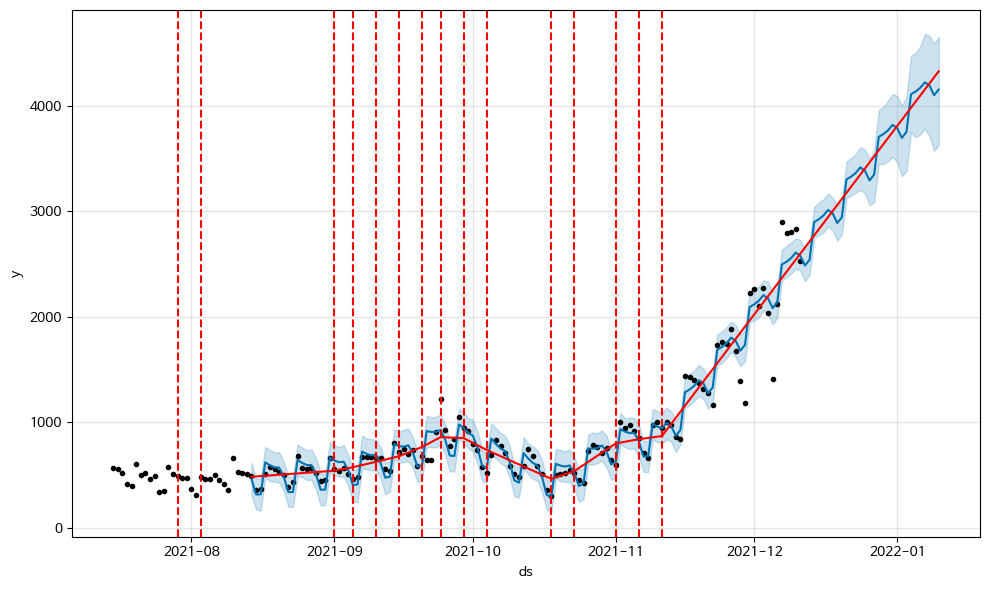

In [ ]:
# 최근 N일 데이터로 시뮬레이션 결과
N = 150
m = Prophet(changepoint_prior_scale=1.5, yearly_seasonality=False, weekly_seasonality=True, daily_seasonality=False)
forecast = m.fit(corona_df.iloc[-N:]).predict(future.iloc[-N:])
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

03:43:44 - cmdstanpy - INFO - Chain [1] start processing
03:43:44 - cmdstanpy - INFO - Chain [1] done processing


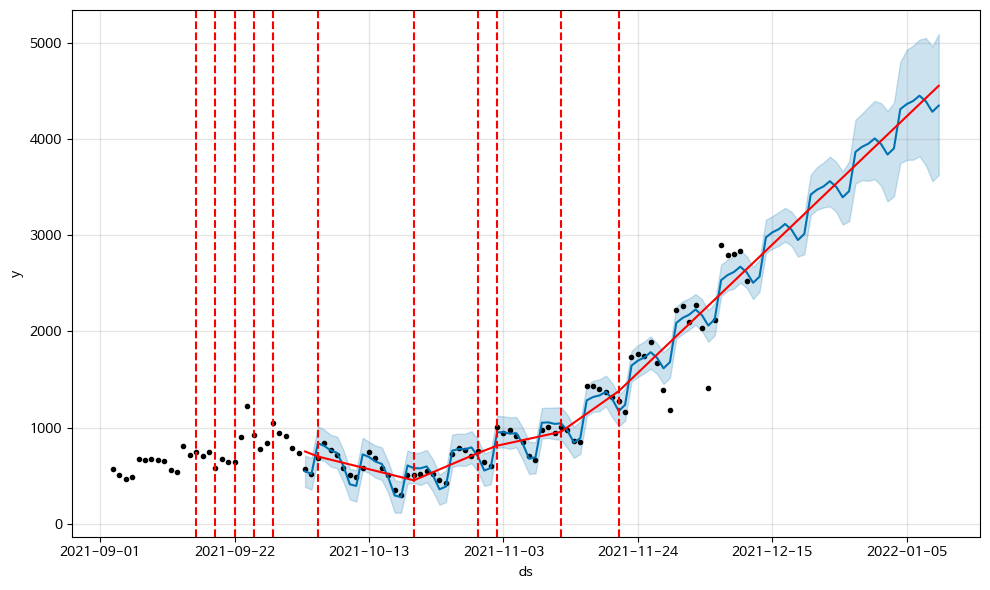

In [ ]:
# 최근 N일 데이터로 시뮬레이션 결과
N = 100
m = Prophet(changepoint_prior_scale=1.5, yearly_seasonality=False, weekly_seasonality=True, daily_seasonality=False)
forecast = m.fit(corona_df.iloc[-N:]).predict(future.iloc[-N:])
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)